In [1]:
library(dplyr) 
library(tidyverse)
library(ggpubr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(Seurat)
obj = readRDS("Gata2_annoated_V2.rds")
obj

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode



An object of class Seurat 
32285 features across 57375 samples within 1 assay 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, harmony, umap

[1] "HSC"


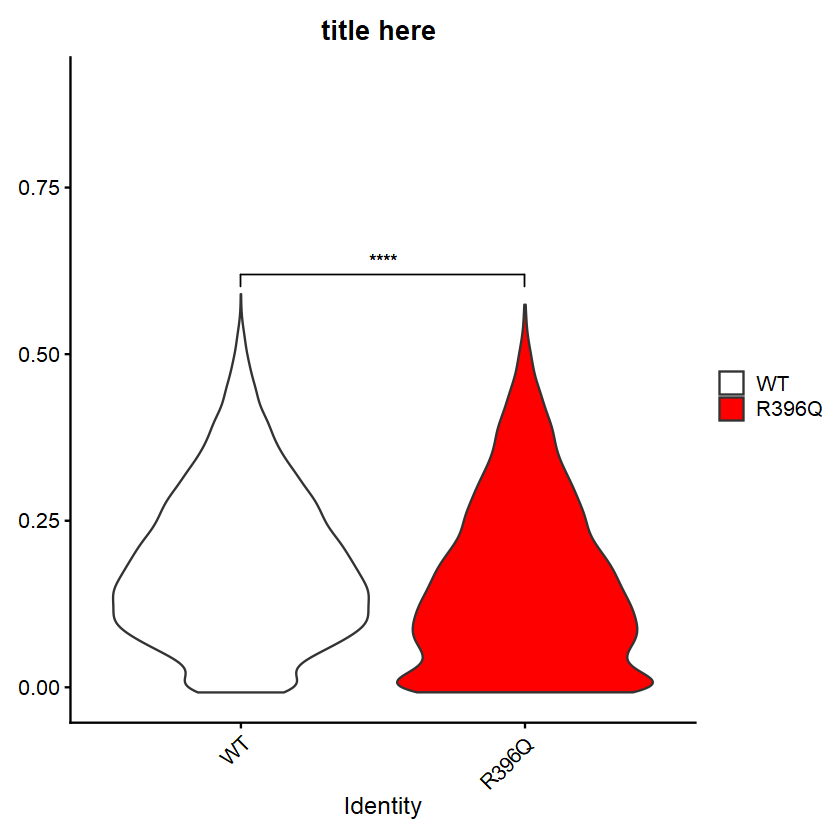

In [7]:
median.stat <- function(x){
out <- quantile(x, probs = c(0.5))
names(out) <- c("ymed")
return(out)
}
vp_case1 <- function(gene_signature, file_name, test_sign, y_max,seurat_obj){
  plot_case1 <- function(signature){
VlnPlot(seurat_obj, features = signature,
pt.size = 0,group.by = "groups2",y.max = y_max # add the y-axis maximum value - otherwise p-value hidden
, cols = c('white','red')) + stat_compare_means(comparisons = test_sign, label = "p.signif")+ggtitle(paste0("title here "))+ stat_compare_means(comparisons = test_sign, label = "p.signif")
  }
  p=purrr::map(gene_signature, plot_case1) %>% cowplot::plot_grid(plotlist = .)
  print(p)
  file_name <- paste0("hsc_score_Vln/",file_name, "_r.png")
  # ggsave(file_name, width = 6, height = 9)
}
 
#for (cls in unique(obj$ref_anno_man)){
for (cls in  c("HSC")){ # Visulaizing the HSC score in HSC cluster
print(cls)
#break
cls_obj = subset(obj,subset=ref_anno_man==cls)
cls_obj$groups2 <- factor(cls_obj$groups, levels = c("WT","R396Q"))
comparisons <- list(c("R396Q", "WT"))
vp_case1(gene_signature = "hsc_score", file_name = cls, test_sign = comparisons, y_max = 0.9,seurat_obj=cls_obj)
break
}

In [4]:
sessionInfo()

R version 4.3.1 (2023-06-16 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 11 x64 (build 22631)

Matrix products: default


locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

time zone: America/Chicago
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] SeuratObject_5.0.0 Seurat_4.0.3       ggpubr_0.6.0       lubridate_1.9.3   
 [5] forcats_1.0.0      stringr_1.5.1      purrr_1.0.2        readr_2.1.4       
 [9] tidyr_1.3.0        tibble_3.2.1       ggplot2_3.4.4      tidyverse_2.0.0   
[13] dplyr_1.1.3       

loaded via a namespace (and not attached):
  [1] RColorBrewer_1.1-3    jsonlite_1.8.7        magrittr_2.0.3       
  [4] spatstat.utils_3.0-4  farver_2.1.1          vctrs_0.6.4        